In [166]:
import pandas as pd
import matplotlib.pyplot as plt
from  haversine import haversine,Unit

In [2]:
df = pd.read_csv("uber.csv")

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [15]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [17]:
df[df['dropoff_longitude'].isnull()]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
87946,32736015,2013-07-02 03:51:57.0000001,24.1,2013-07-02 03:51:57 UTC,-73.950581,40.779692,NaN,NaN,0


In [55]:
df2 = df.drop(['Unnamed: 0','key'],axis=1)
df2.dropna(axis=0,inplace=True)

In [21]:
df2.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [45]:
print(haversine((40.738354,-73.999817),(40.723217,-73.999512), unit=Unit.KILOMETERS))

1.6833561212793353


In [57]:
df2 = df2[
    (df2["pickup_latitude"].between(-90,90)) &
    (df2["pickup_longitude"].between(-180,180)) &
    (df2["dropoff_latitude"].between(-90,90)) &
    (df2["dropoff_longitude"].between(-180,180))
]

In [58]:
df2["Distance"] = df2.apply(lambda x : haversine(
    (x["pickup_latitude"], x["pickup_longitude"]),
    (x["dropoff_latitude"], x["dropoff_longitude"]),
    unit=Unit.KILOMETERS,
), axis = 1)

C:\Users\athar\AppData\Local\Temp\ipykernel_10964\2623727105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Distance"] = df2.apply(lambda x : haversine(


In [59]:
df2.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683325
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457593
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036384
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661686
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475456


Text(0, 0.5, 'Fare')

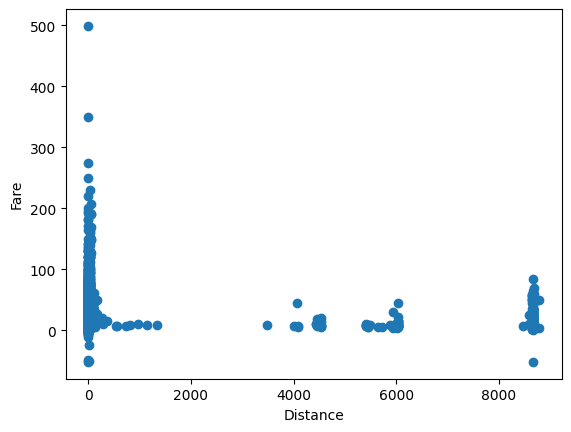

In [60]:
plt.scatter(df2['Distance'], df2[['fare_amount']])
plt.xlabel("Distance")
plt.ylabel("Fare")

In [63]:
'''df2 = df2[
    df2["Distance"] <= 60 & 
    df2["Distance"] < 0 &
    df2["Distance"] > 0 &
    df2["fare_amount"] > 0
]'''

df2 = df2.query("0 < Distance <= 60 and fare_amount > 0 and not ((fare_amount > 100 and Distance < 1) or (fare_amount < 100 and Distance > 100))")


In [64]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193829 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        193829 non-null  float64
 1   pickup_datetime    193829 non-null  object 
 2   pickup_longitude   193829 non-null  float64
 3   pickup_latitude    193829 non-null  float64
 4   dropoff_longitude  193829 non-null  float64
 5   dropoff_latitude   193829 non-null  float64
 6   passenger_count    193829 non-null  int64  
 7   Distance           193829 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 13.3+ MB


In [ ]:
# Could be used to filter the points  - df = df.query("(-90 < pickup_latitude < 90) and (-180 < pickup_longitude < 180) and (-90 < dropoff_latitude < 90) and (-180 < dropoff_longitude < 180)")

13

Text(0, 0.5, 'Fare')

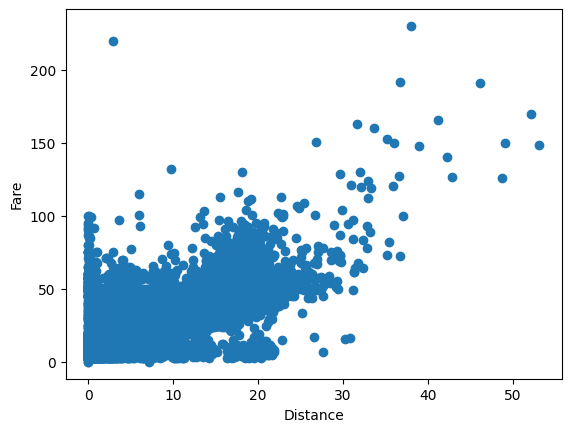

In [70]:
plt.scatter(df2['Distance'], df2['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("Fare")

In [72]:
df2["pickup_datetime"] = pd.to_datetime(df2['pickup_datetime'])

In [78]:
df2["Year"] = df2['pickup_datetime'].dt.year
df2["Month"] = df2['pickup_datetime'].dt.month
df2["Day"] = df2['pickup_datetime'].dt.day
df2["Day_of_Week_Num"] = df2['pickup_datetime'].dt.dayofweek
df2['Day_of_Week'] = df2['pickup_datetime'].dt.day_name().str[:3]
df2["Hour"] = df2['pickup_datetime'].dt.hour

df2['Counter'] = 1

df2['pickup'] = df2['pickup_latitude'].astype(str) + "," + df2['pickup_longitude'].astype(str)
df2['dropoff'] = df2['dropoff_latitude'].astype(str) + "," + df2['dropoff_longitude'].astype(str)

In [79]:
df2.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Day_of_Week_Num,Year,Month,Day,Day_of_Week,Hour,Counter,pickup,dropoff
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683325,3,2015,5,7,Thu,19,1,"40.73835372924805,-73.99981689453125","40.72321701049805,-73.99951171875"
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457593,4,2009,7,17,Fri,20,1,"40.728225,-73.994355","40.750325,-73.99471"
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036384,0,2009,8,24,Mon,21,1,"40.74077,-74.005043","40.772647,-73.962565"
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661686,4,2009,6,26,Fri,8,1,"40.790844,-73.976124","40.803349,-73.965316"
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475456,3,2014,8,28,Thu,17,1,"40.744085,-73.925023","40.761247,-73.97308199999999"


<BarContainer object of 7 artists>

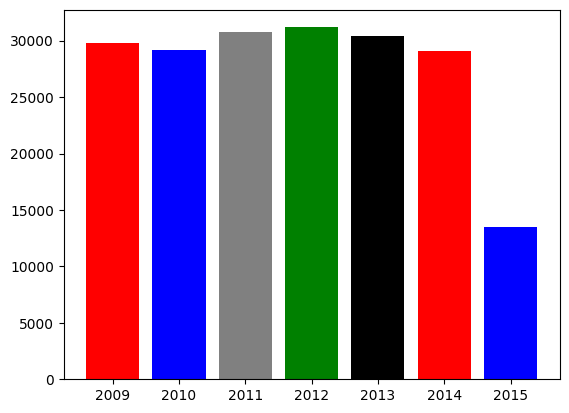

In [86]:
no_of_trips = df2.groupby("Year")['Counter'].sum()

plt.bar([2009, 2010, 2011, 2012, 2013, 2014, 2015],no_of_trips, color = ["red","blue", "grey", "green", "black"])

<BarContainer object of 12 artists>

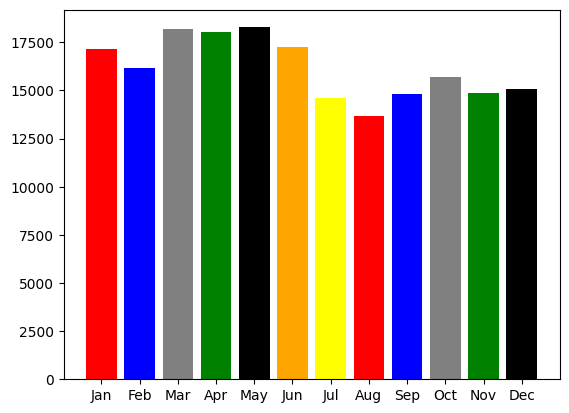

In [87]:
no_of_trips = df2.groupby("Month")['Counter'].sum()

plt.bar(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],no_of_trips, color = ["red","blue", "grey", "green", "black", "orange", "yellow"])

<BarContainer object of 7 artists>

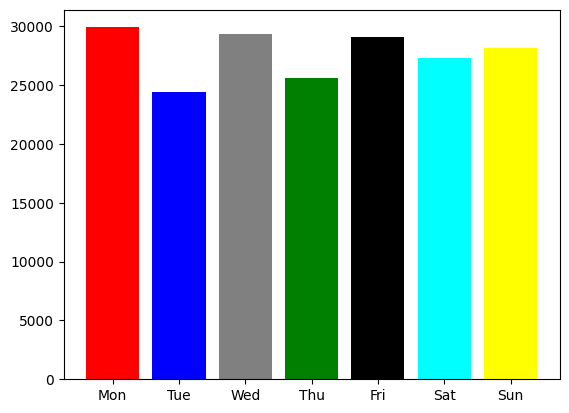

In [ ]:
no_of_trips = df2.groupby("Day_of_Week")['Counter'].sum()

plt.bar(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], no_of_trips, color = ["red","blue", "grey", "green", "black","cyan", "yellow"])

<Axes: title={'center': 'Trips Per Month'}, xlabel='January, 2009 - June, 2015', ylabel='Trips'>

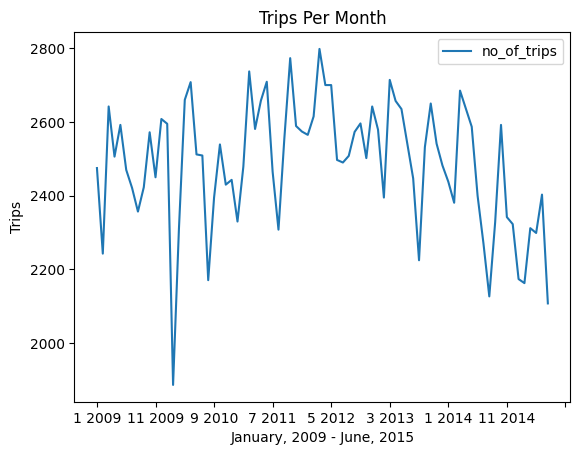

In [101]:
year_vs_trips = df2.groupby(["Year", "Month"]).agg(
    no_of_trips = ('Counter', 'count'),
    Average_Fare = ('fare_amount', 'mean'),
    Total_Fare = ('fare_amount', 'sum'),
    Avg_distance = ('Distance', 'mean')
)

year_vs_trips = year_vs_trips.reset_index()

year_vs_trips["Average_Trips"] = year_vs_trips['no_of_trips']/30
year_vs_trips['Month_Year'] = year_vs_trips['Month'].astype(str) + ' ' + year_vs_trips['Year'].astype(str)

year_vs_trips.plot(
    kind = 'line',
    x = 'Month_Year',
    y = 'no_of_trips',
    xlabel = 'January, 2009 - June, 2015',
    ylabel = 'Trips',
    title = 'Trips Per Month'

)

In [ ]:
import seaborn as sns
import numpy as np

df_1 = df2[['Distance', 'Day_of_Week_Num', 'Hour']].copy()

df_h = df_1.copy()

df_h = df_h.groupby(['Hour', 'Day_of_Week_Num']).mean()

df_h = df_h.unstack(level=0)

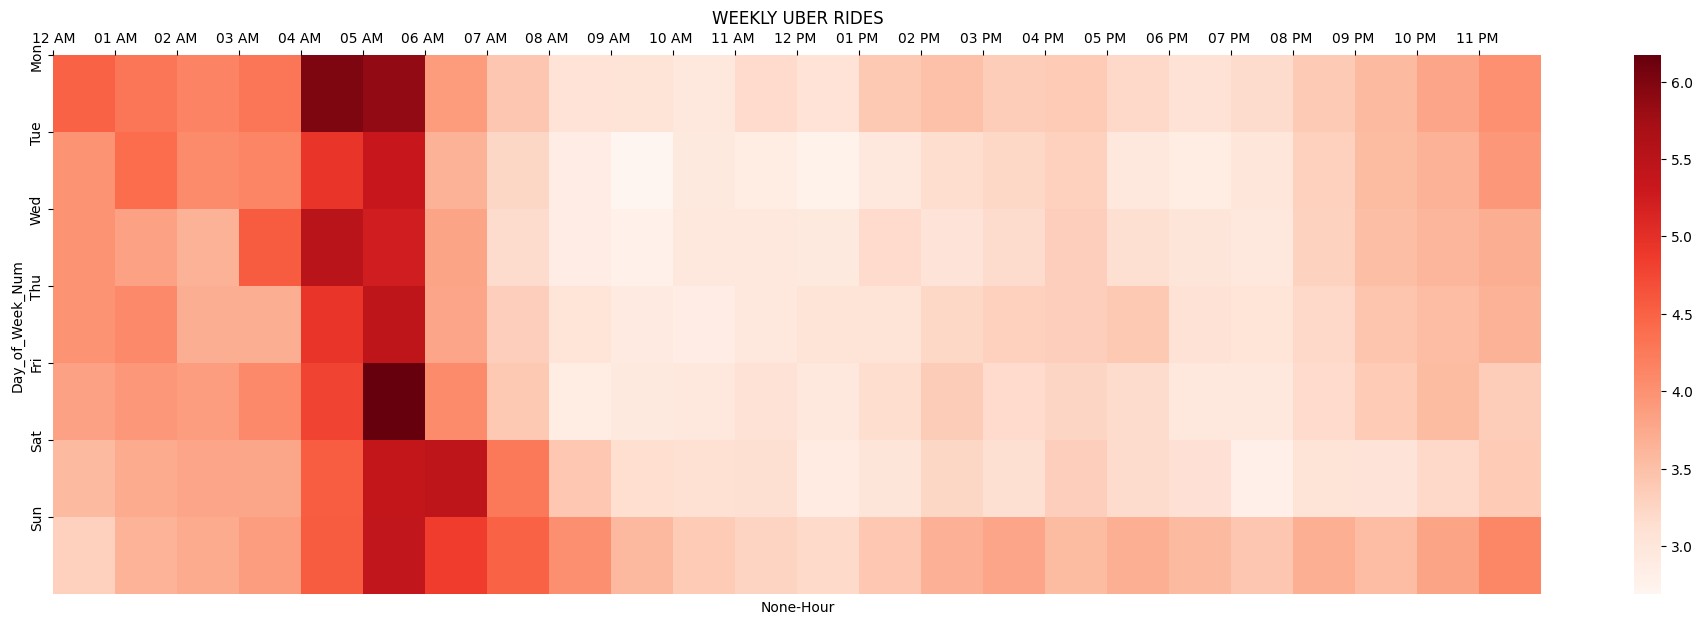

In [116]:
fig, ax = plt.subplots(figsize=(24, 7))
sns.heatmap(df_h, cmap="Reds")

xticks_labels = ['12 AM', '01 AM', '02 AM ', '03 AM ', '04 AM ', '05 AM ', '06 AM ', '07 AM ',
                 '08 AM ', '09 AM ', '10 AM ', '11 AM ', '12 PM ', '01 PM ', '02 PM ', '03 PM ',
                 '04 PM ', '05 PM ', '06 PM ', '07 PM ', '08 PM ', '09 PM ', '10 PM ', '11 PM ']

yticks_labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

plt.xticks(np.arange(24), labels=xticks_labels)
plt.yticks(np.arange(7), labels=yticks_labels)

ax.xaxis.tick_top()
plt.title("WEEKLY UBER RIDES")

plt.show()

In [118]:
import statistics as st

print("Mean of Fare : " , st.mean(df2['fare_amount']))
print("Medain of Fare : " , st.median(df2['fare_amount']))
print("Standard Deviation of Fare : " , st.stdev(df2['fare_amount']))

Mean of Fare :  11.327984615305244
Medain of Fare :  8.5
Standard Deviation of Fare :  9.55451565449486


In [ ]:
corr = df2.select_dtypes(include='number').corr()

corr.style.background_gradient(cmap='GnBu')

c:\Users\athar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\formats\style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\athar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\formats\style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Day_of_Week_Num,Year,Month,Day,Hour,Counter
fare_amount,1.000000,0.011970,-0.008808,0.010464,-0.008621,0.012948,0.885141,0.005432,0.122468,0.024361,0.000162,-0.020213,nan
pickup_longitude,0.011970,1.000000,-0.994006,0.999883,-0.993974,0.009175,0.005357,0.008234,0.013472,-0.007489,0.019511,0.001842,nan
pickup_latitude,-0.008808,-0.994006,1.000000,-0.993994,0.999928,-0.009306,-0.002835,-0.008957,-0.014429,0.008012,-0.020065,-0.000986,nan
dropoff_longitude,0.010464,0.999883,-0.993994,1.000000,-0.993961,0.009169,0.004427,0.008528,0.013357,-0.007447,0.019538,0.000943,nan
dropoff_latitude,-0.008621,-0.993974,0.999928,-0.993961,1.000000,-0.009266,-0.002152,-0.008910,-0.014352,0.007972,-0.020092,-0.001017,nan
passenger_count,0.012948,0.009175,-0.009306,0.009169,-0.009266,1.000000,0.007770,0.033795,0.005153,0.009957,0.003562,0.013369,nan
Distance,0.885141,0.005357,-0.002835,0.004427,-0.002152,0.007770,1.000000,0.017269,0.026879,0.012151,0.000101,-0.032135,nan
Day_of_Week_Num,0.005432,0.008234,-0.008957,0.008528,-0.008910,0.033795,0.017269,1.000000,0.005997,-0.008907,0.005017,-0.086274,nan
Year,0.122468,0.013472,-0.014429,0.013357,-0.014352,0.005153,0.026879,0.005997,1.000000,-0.115569,-0.012271,0.001876,nan
Month,0.024361,-0.007489,0.008012,-0.007447,0.007972,0.009957,0.012151,-0.008907,-0.115569,1.000000,-0.017091,-0.004165,nan


In [122]:
X = df2['Distance'].values.reshape(-1,1)
y = df2['fare_amount'].values.reshape(-1,1)

In [139]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics 

X_std = StandardScaler().fit_transform(X)
y_std = StandardScaler().fit_transform(y)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.2)

In [127]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [130]:
y_pred = model.predict(X_test)

df = {'Actual' : y_test, 'Predicted' : y_pred}

In [138]:
df

{'Actual': array([[-0.75650127],
        [ 0.33199208],
        [-0.29598485],
        ...,
        [-0.66230473],
        [-0.63090589],
        [-0.40064768]], shape=(38766, 1)),
 'Predicted': array([[-0.6336537 ],
        [-0.03257885],
        [-0.10781528],
        ...,
        [-0.60780645],
        [-0.60954952],
        [-0.23609684]], shape=(38766, 1))}

In [145]:
print("MAE : " , metrics.mean_absolute_error(y_test,y_pred))
print("MSE : " , metrics.mean_squared_error(y_test,y_pred))
print("RMSE : " , metrics.root_mean_squared_error(y_test,y_pred))

MAE :  0.23888764853581207
MSE :  0.19891401471833112
RMSE :  0.44599777434235155


Text(0, 0.5, 'Fare')

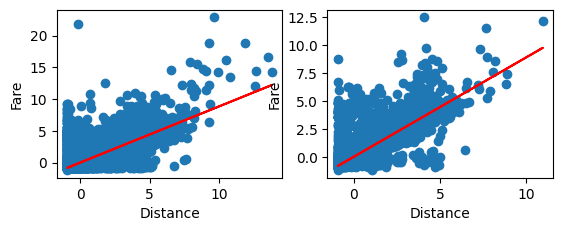

In [154]:
plt.subplot(2,2,1)
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train), color='red')
plt.xlabel("Distance")
plt.ylabel("Fare")


plt.subplot(2,2,2)
plt.scatter(X_test, y_test)
plt.plot(X_test, model.predict(X_test), color = 'red')
plt.xlabel("Distance")
plt.ylabel("Fare")


In [158]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)

In [159]:
rf.fit(X_train, y_train)

c:\Users\athar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [160]:
y_pred = rf.predict(X_test)

In [164]:
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))


R² Score: 0.7056303399250081
MAE: 0.29303323335944753
RMSE: 0.5324533072861316
